<a href="https://colab.research.google.com/github/PriyankaMittapelly/SaiPriyanka_INFO5731_Spring2020/blob/main/In_class_exercise_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The seventh in-class-exercise (20 points in total, 3/16/2021)**

Question description: In the last in-class-exercise (exercise-06), you collected the titles of 100 articles about data science, natural language processing, and machine learning. The 100 article titles will be used as the text corpus of this exercise. Perform the following tasks:

## (1) (8 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here: 

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [12]:
import re
import os
import numpy as np
import pandas as pd
from pprint import pprint
import nltk
nltk.download('stopwords')

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[' Abstract not found ', ' describe a method for statistical modeling based on maximum entropy. We present a maximum-likelihood approach for automatically constructing maximum entropy models and describe how to implement this approach efficiently, using as examples several problems in natural language processing. ', ' Scaling conditional random fields for natural language processing Terms and Conditions: Terms and Conditions: Copyright in works deposited in Minerva Access is retained by the ', ' The paper addresses the issue of cooperation between linguistics and natural language processing (NLP), in general, and between linguistics and machine translation (MT), in particular. It focuses on just one direction of such cooperation, namely applications of linguistics to NLP, virtually ', ' In most natural language processing applications, Description Logics have been used to encode in a knowledge base some syntactic, semantic, and pragmatic elements needed to drive the semantic interpreta

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


[['find'], ['describe', 'statistical', 'modeling', 'base', 'maximum', 'entropy', 'present', 'maximum', 'likelihood', 'approach', 'automatically', 'construct', 'maximum', 'entropy', 'model', 'describe', 'implement', 'approach', 'efficiently', 'use', 'example', 'several', 'problem', 'natural', 'language', 'processing'], ['scale', 'conditional', 'random', 'field', 'natural', 'language', 'processing', 'term', 'condition', 'term', 'condition', 'copyright', 'work', 'deposit', 'access', 'retain'], ['paper', 'address', 'issue', 'cooperation', 'linguistic', 'natural', 'language', 'processing', 'general', 'linguistic', 'machine', 'translation', 'particular', 'focus', 'direction', 'cooperation', 'namely', 'application', 'linguistic', 'nlp', 'virtually'], ['natural', 'language', 'processing', 'application', 'description', 'logic', 'use', 'syntactic', 'semantic', 'pragmatic', 'element', 'need', 'drive', 'semantic', 'interpretation', 'natural', 'language', 'generation', 'process', 'recently', 'descr

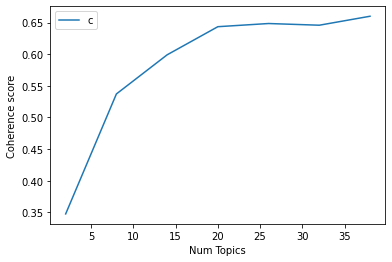

Num Topics = 2  has Coherence Value of 0.3475
Num Topics = 8  has Coherence Value of 0.5372
Num Topics = 14  has Coherence Value of 0.599
Num Topics = 20  has Coherence Value of 0.6435
Num Topics = 26  has Coherence Value of 0.6485
Num Topics = 32  has Coherence Value of 0.6458
Num Topics = 38  has Coherence Value of 0.66
[(0, '0.211*"natural" + 0.174*"system" + 0.092*"process" + 0.037*"limited" + 0.028*"experience" + 0.028*"computer" + 0.018*"deep" + 0.018*"entropy" + 0.018*"discussion" + 0.018*"outline"'), (1, '0.432*"language" + 0.045*"automate" + 0.036*"extraction" + 0.027*"architecture" + 0.027*"role" + 0.027*"sentence" + 0.018*"tagging" + 0.018*"specific" + 0.018*"neural" + 0.018*"snlp"'), (2, '0.158*"application" + 0.139*"learning" + 0.099*"development" + 0.089*"focus" + 0.079*"field" + 0.050*"chapter" + 0.040*"improve" + 0.030*"measure" + 0.030*"opportunity" + 0.020*"noun"'), (3, '0.227*"task" + 0.034*"data" + 0.034*"digital" + 0.034*"speak" + 0.034*"base" + 0.023*"discuss" + 0

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.0887,"natural, system, process, limited, experience,...",This paper describes a natural language syste...
1,1.0,0.1056,"language, automate, extraction, architecture, ...","ABSTRACT: After twenty years of disfavor, a t..."
2,2.0,0.1829,"application, learning, development, focus, fie...",This chapter examines the application of natu...
3,3.0,0.0983,"task, data, digital, speak, base, discuss, glo...",We introduce a method for analyzing the compl...
4,4.0,0.1301,"approach, present, year, learn, provide, find,...","this paper, we will describe a simple rule-ba..."


In [15]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

df = pd.read_csv('/content/Abstract1.csv')

df.head(101)

# Convert to list
data = df['Abstract'].tolist()

# Remove Emails
data = [re.sub('\S*@\S*\s?', '', sent) for sent in data]

# Remove new line characters
data = [re.sub('\s+', ' ', sent) for sent in data]

# Remove distracting single quotes
data = [re.sub("\'", "", sent) for sent in data]

print(data)

def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

data_words = list(sent_to_words(data))

print(data_words)

bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[data_words]])

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out


# Remove Stop Words
data_words_nostops = remove_stopwords(data_words)

# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
clean_text = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(clean_text)

# Create Dictionary
id2word = corpora.Dictionary(clean_text)

# Create Corpus
texts = clean_text

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(id2word[id], freq) for id, freq in cp] for cp in corpus]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

print(lda_model.print_topics())
doc_lda = lda_model[corpus]


# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=clean_text, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis



import os     
def install_java():
  !apt-get install -y openjdk-8-jdk-headless -qq > /dev/null      
  os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"     #set environment variable
  !java -version       
install_java()
!wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
!unzip mallet-2.0.8.zip

import os
mallet_path = '/content/mallet-2.0.8/bin/mallet'
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=clean_text, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)


def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
   
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=clean_text, start=2, limit=40, step=6)


limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

optimal_model = model_list[3]
model_topics = optimal_model.show_topics(formatted=False)
print(optimal_model.print_topics(num_words=10))


def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=data)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

# Show
df_dominant_topic.head()



# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)N

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Text"]

# Show
sent_topics_sorteddf_mallet.head()

In [14]:
!pip install pyLDAvis

## (2) (8 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [1]:
import os.path
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt



In [19]:

def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r") as fin:
        for line in fin.readlines():
            text = line.strip()
            documents_list.append(text)
    print("Total Number of Documents:",len(documents_list))
    titles.append( text[0:min(len(text),100)] )
    return documents_list,titles

In [3]:

def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts

In [20]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [21]:

def create_gensim_lsa_model(doc_clean,num_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel

In [22]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=num_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

In [23]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

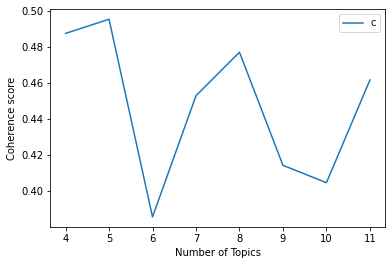

[(0, '0.619*"language" + 0.481*"natural" + 0.423*"processing" + 0.126*"system" + 0.123*"nlp" + 0.094*"use" + 0.080*"application" + 0.077*"machine" + 0.074*"task" + 0.073*"paper" + 0.072*"learning" + 0.064*"include"'), (1, '-0.479*"sense" + -0.375*"would" + -0.363*"information" + -0.250*"sign" + -0.187*"type" + -0.166*"use" + -0.162*"system" + -0.133*"word" + -0.125*"ldoce" + -0.125*"multilingual" + -0.125*"representation" + -0.125*"common"'), (2, '-0.411*"pattern" + -0.206*"progression" + -0.206*"musical" + -0.204*"form" + -0.173*"document" + -0.161*"make" + -0.159*"use" + -0.143*"structure" + -0.140*"music" + -0.137*"propagation" + -0.137*"composition" + -0.137*"whole"'), (3, '0.290*"document" + 0.287*"use" + -0.279*"pattern" + 0.194*"keyfact" + 0.194*"query" + 0.150*"base" + -0.145*"form" + -0.139*"progression" + -0.139*"musical" + -0.139*"would" + 0.137*"semantic" + 0.136*"knowledge"'), (4, '0.426*"nlp" + -0.343*"language" + 0.324*"task" + 0.230*"evaluation" + 0.207*"processing" + 0

In [31]:
start,stop,step=4,12,1
plot_graph(clean_text,start,stop,step)

number_of_topics=8
words=12
model=create_gensim_lsa_model(clean_text,number_of_topics,words)

dictionary,doc_term_matrix= prepare_corpus(clean_text)
model_list_lsa,coherence_values_lsa = compute_coherence_values(dictionary,doc_term_matrix,clean_text,40,2,6)


x = range(start, stop, step)
for m, cv in zip(x, coherence_values_lsa):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

## (3) (4 points) Compare the results generated by the two topic modeling algorithms, which one is better? You should explain the reasons in details.

In [ ]:
# Write your answer here (no code needed for this question)